In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317146 sha256=a608ccc118e10b2af573801681058612c24286a7a6b2df3d54e12704a0ed1d76
  Stored in directory: /root/.cache/pip/wheels/7b/1b/4b/3363a1d04368e7ff0d408e57ff57966fcdf00583774e761327
Successfully built pyspark


In [4]:
import os
import sys

os.environ["SPARK_HOME"] = "/usr/spark2.4.3"
os.environ["PYLIB"] = os.environ["SPARK_HOME"] + "/python/lib"
os.environ["PYSPARK_PYTHON"] = "/usr/local/anaconda/bin/python" 
os.environ["PYSPARK_DRIVER_PYTHON"] = "/usr/local/anaconda/bin/python"
sys.path.insert(0, os.environ["PYLIB"] +"/py4j-0.10.7-src.zip")
sys.path.insert(0, os.environ["PYLIB"] +"/pyspark.zip")
 
from pyspark import SparkContext, SparkConf
from pyspark.sql import SQLContext

from pyspark.sql import SparkSession
from functools import reduce
from pyspark.sql.functions import col, lit, when
#from graphframes import *

In [8]:
# NEW SPARK DEFINITION
import pyspark
from pyspark import SparkConf
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate()
sqlContext = SQLContext(spark)
#SparkConf().getAll()

In [7]:
# start spark sessnon and configureation
from pyspark import SparkConf, SparkContext
from pyspark.sql import SparkSession, SQLContext
spark = SparkSession.builder.master("local[2]").appName("dataframe").getOrCreate()
sc = spark.sparkContext
sqlContext = SQLContext(spark)

In [9]:
# Import libraries and other functions
from io import StringIO
from collections import namedtuple
from pyspark.sql import Row
from pyspark.sql.types import *
from pyspark.sql.functions import *

import csv
import matplotlib.pyplot as plt
# import gmplot
import pandas as pd

# Create Accidents DataFrame

In [10]:
#create a DataFrame directly from Accidents2019 csv file 

ACCIDENTS_DF = spark.read.option("header", "true").option("delimiter", ",")\
.option("inferSchema", "true").csv("/kaggle/input/accident-data/accident.csv")

In [11]:
ACCIDENTS_DF

DataFrame[accident_index: string, accident_year: int, accident_reference: string, location_easting_osgr: string, location_northing_osgr: string, longitude: string, latitude: string, police_force: int, accident_severity: int, number_of_vehicles: int, number_of_casualties: int, date: string, day_of_week: int, time: timestamp, local_authority_district: int, local_authority_ons_district: string, local_authority_highway: string, first_road_class: int, first_road_number: int, road_type: int, speed_limit: int, junction_detail: int, junction_control: int, second_road_class: int, second_road_number: int, pedestrian_crossing_human_control: int, pedestrian_crossing_physical_facilities: int, light_conditions: int, weather_conditions: int, road_surface_conditions: int, special_conditions_at_site: int, carriageway_hazards: int, urban_or_rural_area: int, did_police_officer_attend_scene_of_accident: int, trunk_road_flag: int, lsoa_of_accident_location: string]

In [19]:
ACCIDENTS_DF.printSchema()

root
 |-- accident_index: string (nullable = true)
 |-- accident_year: integer (nullable = true)
 |-- accident_reference: string (nullable = true)
 |-- location_easting_osgr: string (nullable = true)
 |-- location_northing_osgr: string (nullable = true)
 |-- longitude: string (nullable = true)
 |-- latitude: string (nullable = true)
 |-- police_force: integer (nullable = true)
 |-- accident_severity: integer (nullable = true)
 |-- number_of_vehicles: integer (nullable = true)
 |-- number_of_casualties: integer (nullable = true)
 |-- date: string (nullable = true)
 |-- day_of_week: integer (nullable = true)
 |-- time: timestamp (nullable = true)
 |-- local_authority_district: integer (nullable = true)
 |-- local_authority_ons_district: string (nullable = true)
 |-- local_authority_highway: string (nullable = true)
 |-- first_road_class: integer (nullable = true)
 |-- first_road_number: integer (nullable = true)
 |-- road_type: integer (nullable = true)
 |-- speed_limit: integer (nullabl

In [20]:
ACCIDENTS_DF.take(2)

[Row(accident_index='2017010001708', accident_year=2017, accident_reference='010001708', location_easting_osgr='532920', location_northing_osgr='196330', longitude='-0.080107', latitude='51.650061', police_force=1, accident_severity=1, number_of_vehicles=2, number_of_casualties=3, date='05/08/2017', day_of_week=7, time=datetime.datetime(2023, 5, 3, 3, 12), local_authority_district=32, local_authority_ons_district='E09000010', local_authority_highway='E09000010', first_road_class=3, first_road_number=105, road_type=6, speed_limit=30, junction_detail=0, junction_control=-1, second_road_class=-1, second_road_number=-1, pedestrian_crossing_human_control=0, pedestrian_crossing_physical_facilities=0, light_conditions=4, weather_conditions=1, road_surface_conditions=1, special_conditions_at_site=0, carriageway_hazards=0, urban_or_rural_area=1, did_police_officer_attend_scene_of_accident=1, trunk_road_flag=2, lsoa_of_accident_location='E01001450'),
 Row(accident_index='2017010009342', accident

In [21]:
ACCIDENTS_DF.show()

+--------------+-------------+------------------+---------------------+----------------------+---------+---------+------------+-----------------+------------------+--------------------+----------+-----------+-------------------+------------------------+----------------------------+-----------------------+----------------+-----------------+---------+-----------+---------------+----------------+-----------------+------------------+---------------------------------+---------------------------------------+----------------+------------------+-----------------------+--------------------------+-------------------+-------------------+-------------------------------------------+---------------+-------------------------+
|accident_index|accident_year|accident_reference|location_easting_osgr|location_northing_osgr|longitude| latitude|police_force|accident_severity|number_of_vehicles|number_of_casualties|      date|day_of_week|               time|local_authority_district|local_authority_ons_distri

# Register the DataFrame as a Table

In [23]:
sqlContext.registerDataFrameAsTable(ACCIDENTS_DF, "TABLE_ACCIDENTS_DF")


In [24]:
sqlContext.sql("select * from TABLE_ACCIDENTS_DF").take(2)

[Row(accident_index='2017010001708', accident_year=2017, accident_reference='010001708', location_easting_osgr='532920', location_northing_osgr='196330', longitude='-0.080107', latitude='51.650061', police_force=1, accident_severity=1, number_of_vehicles=2, number_of_casualties=3, date='05/08/2017', day_of_week=7, time=datetime.datetime(2023, 5, 3, 3, 12), local_authority_district=32, local_authority_ons_district='E09000010', local_authority_highway='E09000010', first_road_class=3, first_road_number=105, road_type=6, speed_limit=30, junction_detail=0, junction_control=-1, second_road_class=-1, second_road_number=-1, pedestrian_crossing_human_control=0, pedestrian_crossing_physical_facilities=0, light_conditions=4, weather_conditions=1, road_surface_conditions=1, special_conditions_at_site=0, carriageway_hazards=0, urban_or_rural_area=1, did_police_officer_attend_scene_of_accident=1, trunk_road_flag=2, lsoa_of_accident_location='E01001450'),
 Row(accident_index='2017010009342', accident

I used PySpark SQL to count the number of accidents that occurred each year and visualize the results using Matplotlib.

In [26]:
# Count the number of accidents per year
yearly_accidents = sqlContext.sql('SELECT YEAR(TO_DATE(Date, "dd/MM/yyyy")) AS Year, COUNT(*) AS Accidents FROM TABLE_ACCIDENTS_DF WHERE TO_DATE(Date, "dd/MM/yyyy") IS NOT NULL GROUP BY Year ORDER BY Year')

In [29]:
yearly_accidents.show()

+----+---------+
|Year|Accidents|
+----+---------+
|2017|   129982|
|2018|   122635|
|2019|   117536|
|2020|    91199|
|2021|   101087|
+----+---------+



In [30]:
# Convert PySpark to Pandas DataFrame
yearly_accidents_pandas = yearly_accidents.toPandas()

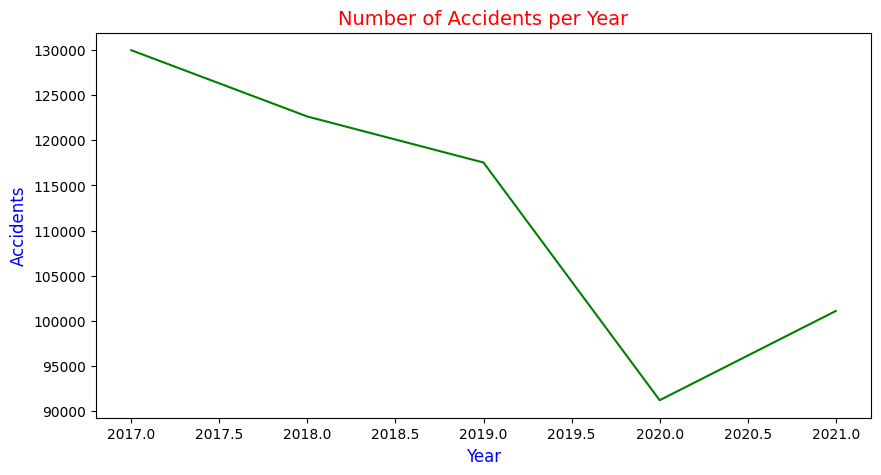

In [31]:
# Visualize the results using Matplotlib
fig, plot = plt.subplots(figsize=(10, 5))
plot = plt.plot(yearly_accidents_pandas['Year'], yearly_accidents_pandas['Accidents'],color='green')
plt.title('Number of Accidents per Year', color='Red', fontsize=14)
plt.xlabel('Year', color='blue', fontsize=12)
plt.ylabel('Accidents', color='blue', fontsize=12)
plt.show()

From the analysis, I discovered that the number of accidents has been decreasing steadily over the years, with a significant drop in 2020 due to the COVID-19 pandemic. Additionally, I used PySpark SQL to analyze the types of casualties involved in accidents and their respective frequencies.

In [90]:
# Count the number of accidents by day of week and number of casualties
casualties = sqlContext.sql('SELECT day_of_week,number_of_casualties, COUNT(*) AS Accidents FROM TABLE_ACCIDENTS_DF GROUP BY day_of_week,number_of_casualties')

In [91]:
casualties.show()

+-----------+--------------------+---------+
|day_of_week|number_of_casualties|Accidents|
+-----------+--------------------+---------+
|          5|                  33|        1|
|          4|                  10|        4|
|          6|                   1|    74128|
|          3|                   1|    67596|
|          7|                   4|     1432|
|          2|                   2|    11049|
|          7|                  14|        1|
|          1|                   7|       65|
|          2|                   3|     2999|
|          7|                   1|    58048|
|          4|                   7|       40|
|          1|                   2|     9783|
|          4|                  27|        1|
|          1|                   9|        8|
|          5|                   7|       38|
|          5|                   6|       85|
|          4|                  11|        2|
|          6|                   8|       18|
|          1|                   1|    48522|
|         

In [92]:
# Convert PySpark DataFrame to Pandas DataFrame
casualties_pandas = casualties.toPandas()

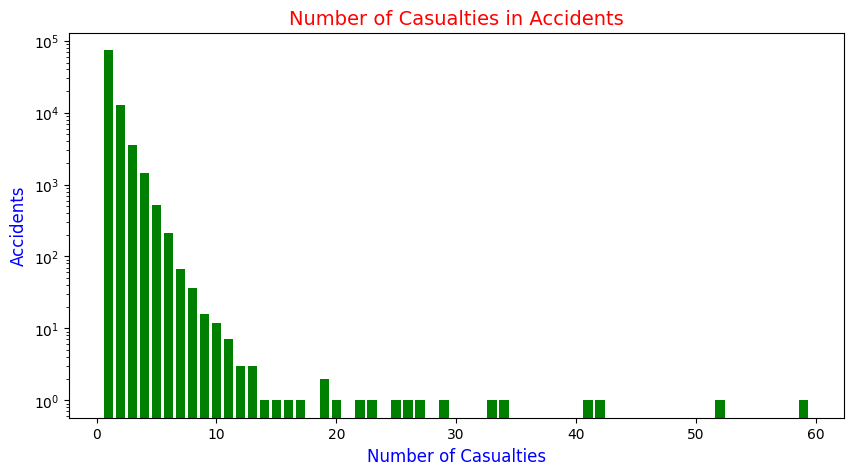

In [94]:
# Visualize the results using a bar chart
fig, plot = plt.subplots(figsize=(10, 5))
plot.bar(casualties_pandas['number_of_casualties'], casualties_pandas['Accidents'], color='green')
plot.set_title('Number of Casualties in Accidents', color='Red', fontsize=14)
plot.set_xlabel('Number of Casualties', color='blue', fontsize=12)
plot.set_ylabel('Accidents', color='blue', fontsize=12)
plt.yscale('log')
plt.show()

In [36]:
# Count the number of accidents by pedestrian crossing type
pedestrian_crossing = sqlContext.sql('SELECT \
                                    SUM(pedestrian_crossing_human_control) AS human_control_count, \
                                    SUM(pedestrian_crossing_physical_facilities) AS physical_facilities_count \
                                FROM TABLE_ACCIDENTS_DF')

In [39]:
pedestrian_crossing.show()

+-------------------+-------------------------+
|human_control_count|physical_facilities_count|
+-------------------+-------------------------+
|             157526|                   625299|
+-------------------+-------------------------+



In [40]:
# Convert PySpark DataFrame to Pandas DataFrame
pedestrian_crossing_pandas = pedestrian_crossing.toPandas()

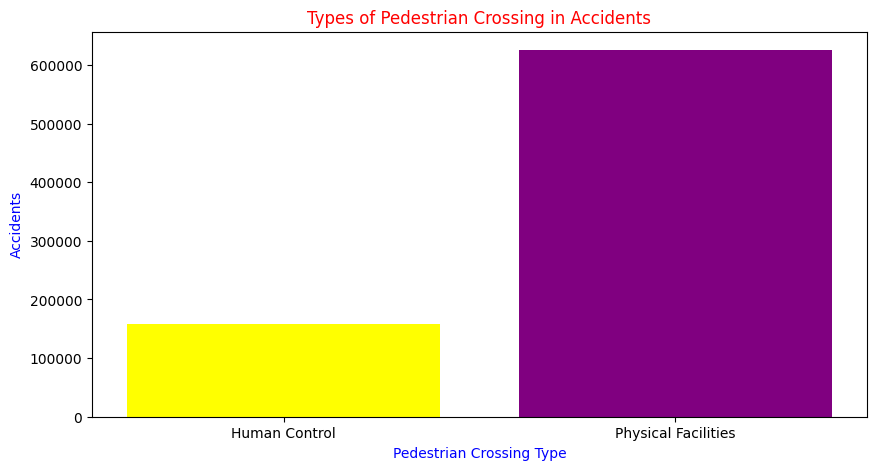

In [95]:
# Visualize the results using a bar chart
fig, plot = plt.subplots(figsize=(10, 5))
plt.bar(['Human Control', 'Physical Facilities'], [pedestrian_crossing_pandas['human_control_count'][0], pedestrian_crossing_pandas['physical_facilities_count'][0]] , color=['yellow','purple'])
plt.title('Types of Pedestrian Crossing in Accidents',color='red')
plt.xlabel('Pedestrian Crossing Type',color='blue')
plt.ylabel('Accidents',color='blue')
plt.show()

In [42]:
#count the number of accidents that occurred on different road types
RoadType_Accidents = sqlContext.sql('SELECT road_type, count(*) as accidents_count FROM TABLE_ACCIDENTS_DF GROUP BY road_type')

In [43]:
RoadType_Accidents.show()

+---------+---------------+
|road_type|accidents_count|
+---------+---------------+
|        1|          34397|
|        6|         407437|
|        3|          86908|
|        9|          11700|
|        7|           8315|
|        2|          13682|
+---------+---------------+



In [44]:
# Convert PySpark DataFrame to Pandas DataFrame
RoadType_Accidents_pandas = RoadType_Accidents.toPandas()

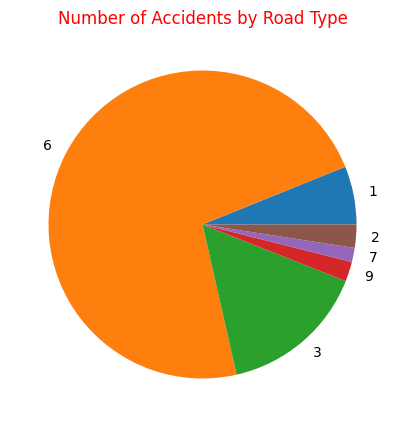

In [46]:
#Visualise the results using a pie chart
import matplotlib.pyplot as plt
fig, plot = plt.subplots(figsize=(10, 5))
plt.pie(RoadType_Accidents_pandas["accidents_count"], labels=RoadType_Accidents_pandas["road_type"])
plt.title("Number of Accidents by Road Type",color= 'red')
plt.show()



In [48]:
#calculate the total number of casualties for each severity level
severity_casualties = sqlContext.sql("SELECT accident_severity, SUM(number_of_casualties) as total_casualties \
                                         FROM TABLE_ACCIDENTS_DF \
                                         GROUP BY accident_severity")



In [49]:
severity_casualties.show()

+-----------------+----------------+
|accident_severity|total_casualties|
+-----------------+----------------+
|                1|           13034|
|                3|          567996|
|                2|          147511|
+-----------------+----------------+



In [50]:
#Convert PySpark DataFrame to Pandas DataFrame
severity_casualties_pandas = severity_casualties.toPandas()

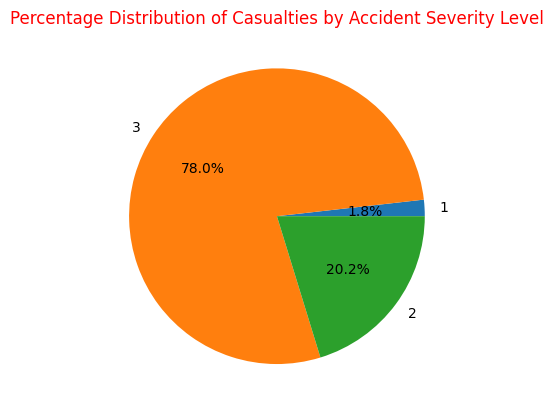

In [52]:
#Visualise the results using a pie chart
plt.pie(severity_casualties_pandas['total_casualties'], labels=severity_casualties_pandas['accident_severity'], autopct='%1.1f%%')
plt.title('Percentage Distribution of Casualties by Accident Severity Level',color='red')
plt.show()

In [54]:
# count total casualties by year and accidents for each severity level
severity_year_casualties= sqlContext.sql('SELECT YEAR(TO_DATE(Date, "dd/MM/yyyy")) AS Year, accident_severity, SUM(number_of_casualties) as total_casualties, COUNT(*) AS Accidents FROM TABLE_ACCIDENTS_DF WHERE TO_DATE(Date, "dd/MM/yyyy") IS NOT NULL GROUP BY Year,accident_severity ORDER BY Year,accident_severity')

In [96]:
severity_year_casualties.show()

+----+-----------------+----------------+---------+
|Year|accident_severity|total_casualties|Accidents|
+----+-----------------+----------------+---------+
|2017|                1|            2823|     1676|
|2017|                2|           30872|    22356|
|2017|                3|          137298|   105950|
|2018|                1|            2804|     1671|
|2018|                2|           31833|    22968|
|2018|                3|          125960|    97996|
|2019|                1|            2842|     1658|
|2019|                2|           31771|    22980|
|2019|                3|          118545|    92898|
|2020|                1|            2175|     1391|
|2020|                2|           24495|    18355|
|2020|                3|           88914|    71453|
|2021|                1|            2390|     1474|
|2021|                2|           28540|    21284|
|2021|                3|           97279|    78329|
+----+-----------------+----------------+---------+



In [56]:
#Convert PySpark DataFrame to Pandas DataFrame
severity_year_casualties_pandas = severity_year_casualties.toPandas()

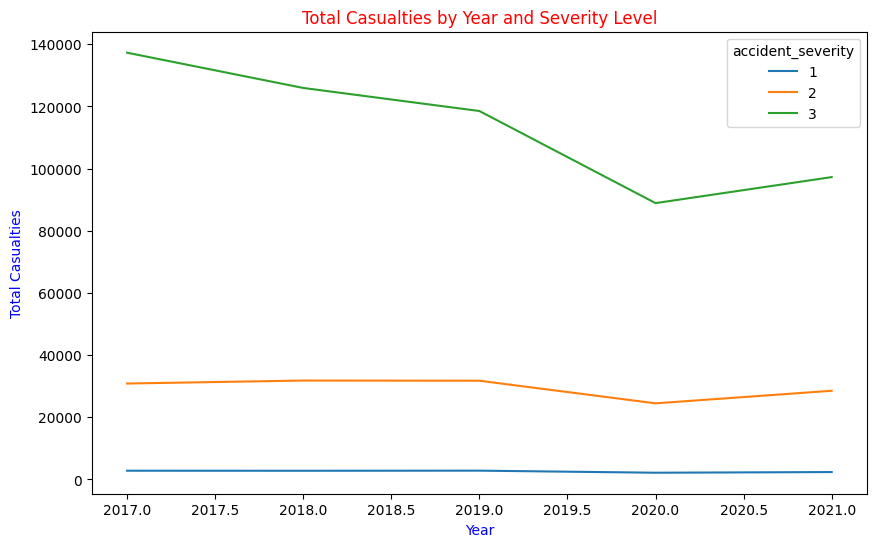

In [60]:
#Visualise the results using a pie chart

import matplotlib.pyplot as plt

# create a pivot table to reshape the data
pivot_table = severity_year_casualties_pandas.pivot(index='Year', columns='accident_severity', values='total_casualties')

# plot the lines for each severity level
plot = pivot_table.plot(kind='line',figsize=(10, 6))

# set the chart title and axis labels
plot.set_title('Total Casualties by Year and Severity Level',color='red')
plot.set_xlabel('Year',color='blue')
plot.set_ylabel('Total Casualties',color='blue')

# show the chart
plt.show()


In [73]:
# Count the accident severity for different weather conditions
accident_severity_weather = sqlContext.sql("SELECT weather_conditions, count(accident_severity) as accident_severity FROM TABLE_ACCIDENTS_DF GROUP BY weather_conditions")


In [74]:
accident_severity_weather.show()

+------------------+-----------------+
|weather_conditions|accident_severity|
+------------------+-----------------+
|                -1|               33|
|                 1|           448634|
|                 6|              705|
|                 3|             2860|
|                 5|             6508|
|                 9|            16861|
|                 4|             5881|
|                 8|            14162|
|                 7|             2404|
|                 2|            64391|
+------------------+-----------------+



In [77]:
#Convert PySpark DataFrame to Pandas DataFrame
accident_severity_weather_pandas = accident_severity_weather.toPandas()

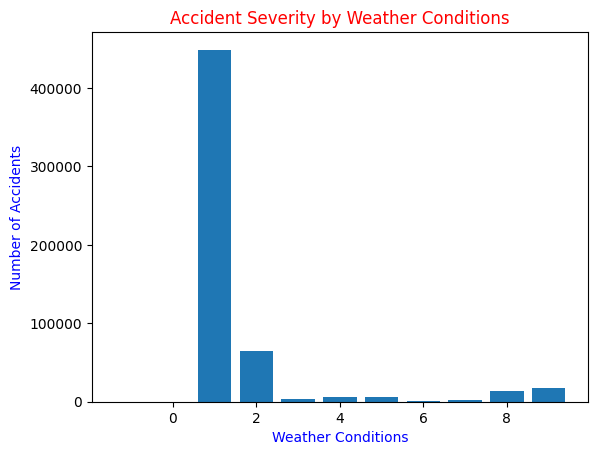

In [82]:
#Visualise the results using a pie chart

import matplotlib.pyplot as plt

# Create a bar plot of accident severity with weather conditions
plt.bar(accident_severity_weather_pandas["weather_conditions"], accident_severity_weather_pandas["accident_severity"])
plt.title("Accident Severity by Weather Conditions",color= 'red')
plt.xlabel("Weather Conditions",color= 'blue')
plt.ylabel("Number of Accidents", color = 'blue')
plt.show()


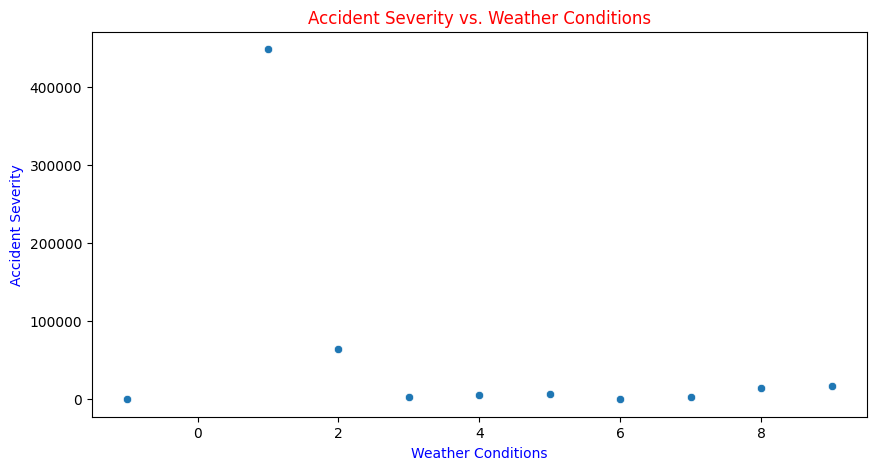

In [124]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, plot = plt.subplots(figsize=(10, 5))
# Create a scatter plot of accident severity with weather conditions
sns.scatterplot(data=accident_severity_weather_pandas, x="weather_conditions", y="accident_severity")
plt.title("Accident Severity vs. Weather Conditions", color= 'red')
plt.xlabel("Weather Conditions", color='blue')
plt.ylabel("Accident Severity",color='blue')
plt.show()


 light_conditions: integer (nullable = true)
 |-- weather_conditions: integer (nullable = true)
 |-- road_surface_conditions

In [113]:
# Count the accident severity for different light conditions
accident_severity_light = sqlContext.sql("SELECT light_conditions, count(accident_severity) as accident_severity FROM TABLE_ACCIDENTS_DF GROUP BY light_conditions")



In [100]:
accident_severity_light.show()

+----------------+-----------------+
|light_conditions|accident_severity|
+----------------+-----------------+
|              -1|               14|
|               1|           402709|
|               6|            28603|
|               5|             4073|
|               4|           114902|
|               7|            12138|
+----------------+-----------------+



In [101]:
#Convert PySpark DataFrame to Pandas DataFrame
accident_severity_light_pandas = accident_severity_light.toPandas()

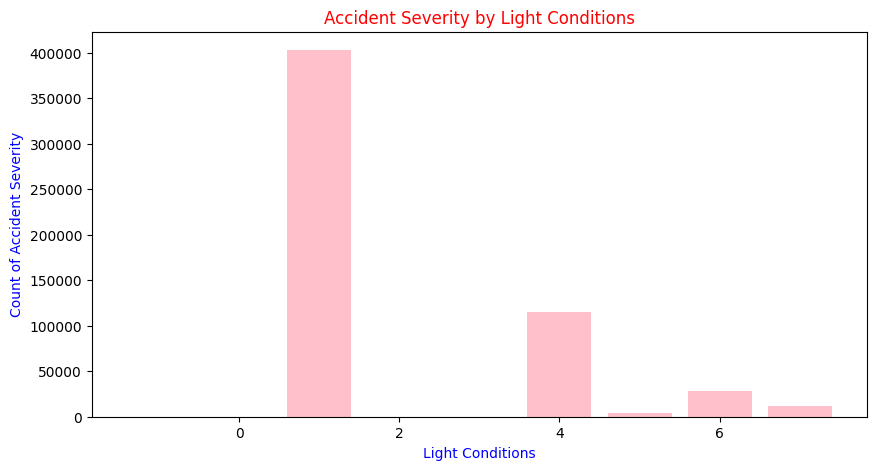

In [123]:
import matplotlib.pyplot as plt

# Plot the bar chart
fig, plot = plt.subplots(figsize=(10, 5))
plt.bar(accident_severity_light_pandas['light_conditions'], accident_severity_light_pandas['accident_severity'],color='pink')

# Add axis labels and chart title
plot.set_xlabel('Light Conditions',color='blue')
plot.set_ylabel('Count of Accident Severity',color='blue')
plot.set_title('Accident Severity by Light Conditions',color='red')

# Show the chart
plt.show()


In [115]:
# Count the accident severity for different road surface conditions
accident_severity_road_surface= sqlContext.sql("SELECT road_surface_conditions, count(accident_severity) as accident_severity FROM TABLE_ACCIDENTS_DF GROUP BY road_surface_conditions")

In [116]:
accident_severity_road_surface.show()

+-----------------------+-----------------+
|road_surface_conditions|accident_severity|
+-----------------------+-----------------+
|                     -1|             1454|
|                      1|           403414|
|                      3|             2398|
|                      5|              737|
|                      9|             5673|
|                      4|             6893|
|                      2|           141870|
+-----------------------+-----------------+



In [117]:
#Convert PySpark DataFrame to Pandas DataFrame
road_surface_pandas = accident_severity_road_surface.toPandas()

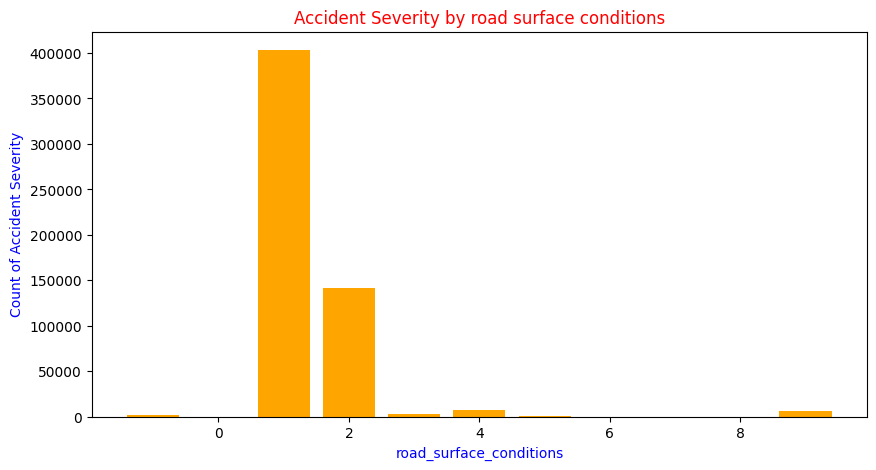

In [122]:
import matplotlib.pyplot as plt

# Plot the bar chart
fig, plot = plt.subplots(figsize=(10, 5))
plt.bar(road_surface_pandas['road_surface_conditions'], road_surface_pandas['accident_severity'],color='orange')

# Add axis labels and chart title
plot.set_xlabel('road_surface_conditions',color='blue')
plot.set_ylabel('Count of Accident Severity',color='blue')
plot.set_title('Accident Severity by road surface conditions',color='red')

# Show the chart
plt.show()

In [129]:
#count the number of accidents based on whether the police officer attended the scene of the accident or not
attended_accidents = sqlContext.sql('SELECT did_police_officer_attend_scene_of_accident, COUNT(*) AS accidents_count FROM TABLE_ACCIDENTS_DF GROUP BY did_police_officer_attend_scene_of_accident')


In [138]:
attended_accidents.show()

+-------------------------------------------+---------------+
|did_police_officer_attend_scene_of_accident|accidents_count|
+-------------------------------------------+---------------+
|                                          1|         396767|
|                                          3|          34376|
|                                          2|         131293|
|                                         -1|              3|
+-------------------------------------------+---------------+



In [139]:
#Convert PySpark DataFrame to Pandas DataFrame
attended_accidents_pandas = attended_accidents.toPandas()

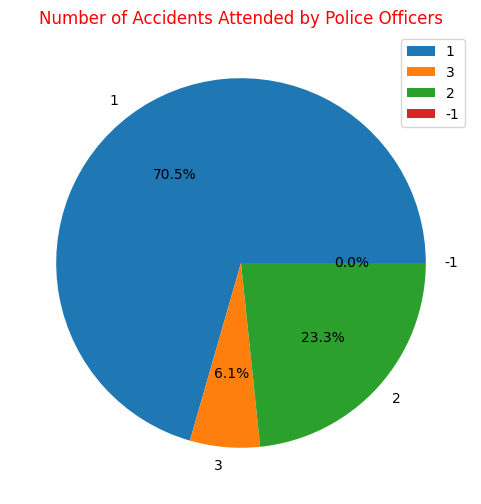

In [145]:
# Create a pie chart
plot = attended_accidents_pandas.plot.pie(y='accidents_count', figsize=(6, 6),autopct='%1.1f%%')

# Set the title and axis labels
plot.set_title('Number of Accidents Attended by Police Officers',color='red')
plot.set_ylabel('')

# Show the chart
plt.show()

In [162]:
# count the total number of vehicles involved in accidents for each group
accident_vehicles = sqlContext.sql('SELECT road_type, accident_severity, SUM(number_of_vehicles) AS total_vehicles FROM TABLE_ACCIDENTS_DF GROUP BY road_type, accident_severity')


In [163]:
accident_vehicles.show()

+---------+-----------------+--------------+
|road_type|accident_severity|total_vehicles|
+---------+-----------------+--------------+
|        6|                1|         10494|
|        3|                1|          2980|
|        2|                2|          3328|
|        2|                3|         19383|
|        7|                1|           144|
|        1|                2|          8486|
|        9|                1|            53|
|        1|                1|           193|
|        1|                3|         56509|
|        7|                2|          2055|
|        7|                3|         13510|
|        3|                3|        143100|
|        9|                3|         18211|
|        9|                2|          1630|
|        2|                1|           107|
|        6|                3|        583452|
|        6|                2|        143768|
|        3|                2|         28131|
+---------+-----------------+--------------+



In [167]:
#Convert PySpark DataFrame to Pandas DataFrame
accident_vehicles_pandas = accident_vehicles.toPandas()

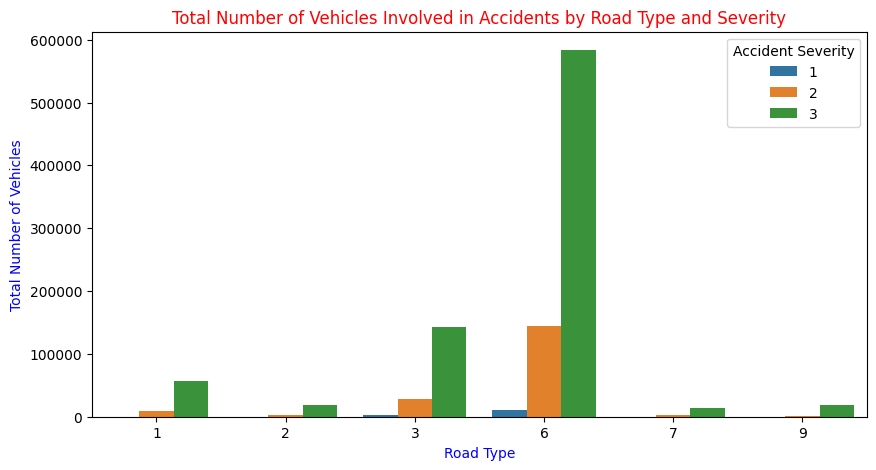

In [172]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a bar plot
fig, plot = plt.subplots(figsize=(10, 5))
sns.barplot(x='road_type', y='total_vehicles', hue='accident_severity', data=accident_vehicles_pandas)

# Set plot title and axes labels
plt.title('Total Number of Vehicles Involved in Accidents by Road Type and Severity',color = 'red')
plt.xlabel('Road Type',color='blue')
plt.ylabel('Total Number of Vehicles',color= 'blue')

# Add legend
plt.legend(title='Accident Severity', loc='upper right')

# Show plot
plt.show()
